In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('data_set/Mall_Customers.csv')

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

<Axes: ylabel='Annual Income (k$)'>

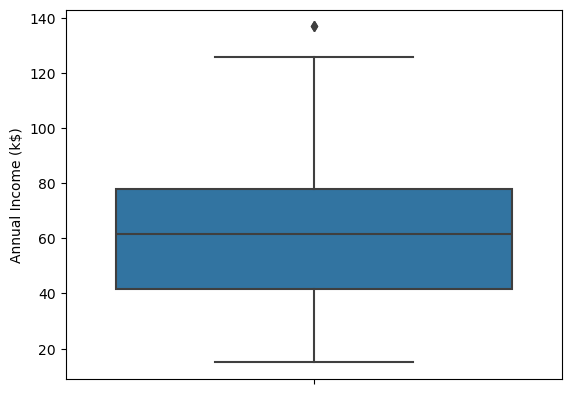

In [5]:
sns.boxplot(data = df, y ='Annual Income (k$)')

<Axes: ylabel='Spending Score (1-100)'>

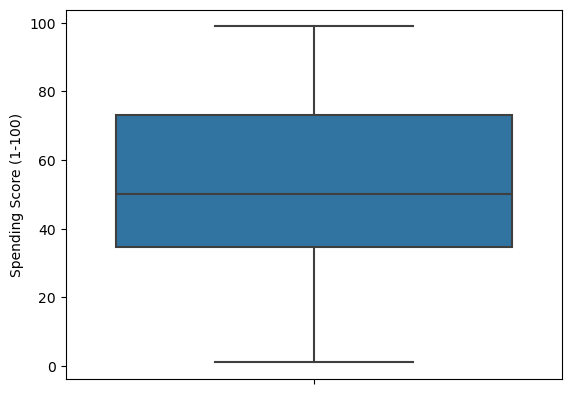

In [6]:
sns.boxplot(data = df, y ='Spending Score (1-100)')

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
from sklearn.cluster import KMeans

In [10]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]

In [11]:
wcss = []
for k in range(1,9):
    cluster = KMeans(n_clusters = k,init='k-means++', random_state = 0)
    cluster.fit(x)
    wcss.append(cluster.inertia_)

C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

In [12]:
wcss

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997544]

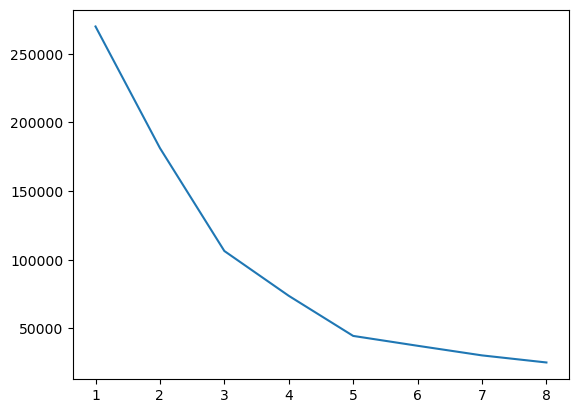

In [13]:
plt.plot(range(1,9),wcss)

In [14]:
km = KMeans(n_clusters = 5,init='k-means++', random_state = 30)

In [15]:
km.fit_predict(x)

C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [16]:
df['cluster'] = km.fit_predict(x)

C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     cluster  
0          4  
1          0  
2          4  
3          0  
4          4  
..       ...  
195        3  
196        2  
197        3  
198        2  
199        3  

[200 rows x 6 columns]

In [18]:
centers = km.cluster_centers_
center_df = pd.DataFrame(data = centers, columns=['Feature 1', 'Feature 2'])
center_df

Feature 1  Feature 2
0  25.727273  79.363636
1  55.296296  49.518519
2  88.200000  17.114286
3  86.538462  82.128205
4  26.304348  20.913043

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

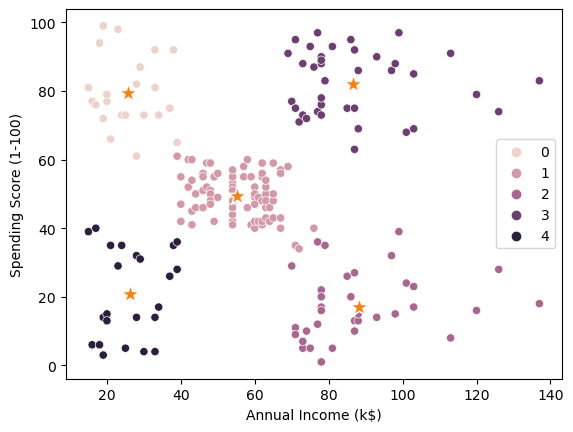

In [19]:
sns.scatterplot(data =df, x ='Annual Income (k$)',y ='Spending Score (1-100)', hue = 'cluster')
sns.scatterplot(data= center_df, x='Feature 1',y='Feature 2', marker = '*', s= 200)

In [20]:
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(df[['Annual Income (k$)','Spending Score (1-100)']], df['cluster'])
print(f'Silhouette Score for KMeans: {silhouette_kmeans}')

Silhouette Score for KMeans: 0.553931997444648


In [21]:
from sklearn.cluster import DBSCAN

In [22]:
dbscan = DBSCAN(eps =3,min_samples=5)

dbscan.fit(x[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN(eps=3)

In [23]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  2,  1,  1,  1,  1,  2,  1,  1,  2,  2,  1,
        2, -1,  1, -1,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
       -1, -1, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,  4, -1,  4, -1, -1,
       -1,  4, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [24]:
dbscan = DBSCAN(eps =8,min_samples=5)
dbscan.fit(x[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN(eps=8)

In [25]:
dbscan.labels_

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1, -1,  2, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5, -1,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [26]:
x1 = x[['Annual Income (k$)','Spending Score (1-100)']]
x1['dbscan_cluster_name'] = dbscan.labels_   
x1

Annual Income (k$)  Spending Score (1-100)  dbscan_cluster_name
0                    15                      39                    2
1                    15                      81                    0
2                    16                       6                    1
3                    16                      77                    0
4                    17                      40                    2
..                  ...                     ...                  ...
195                 120                      79                   -1
196                 126                      28                   -1
197                 126                      74                   -1
198                 137                      18                   -1
199                 137                      83                   -1

[200 rows x 3 columns]

In [27]:
x2 = x[['Annual Income (k$)','Spending Score (1-100)']]
x2['kmean_cluster_name'] = km.labels_

In [28]:
x2

Annual Income (k$)  Spending Score (1-100)  kmean_cluster_name
0                    15                      39                   4
1                    15                      81                   0
2                    16                       6                   4
3                    16                      77                   0
4                    17                      40                   4
..                  ...                     ...                 ...
195                 120                      79                   3
196                 126                      28                   2
197                 126                      74                   3
198                 137                      18                   2
199                 137                      83                   3

[200 rows x 3 columns]

In [29]:
true_label = x2['kmean_cluster_name']
predicted_label = x1['dbscan_cluster_name'] 


In [30]:
from sklearn import metrics
metrics.adjusted_rand_score(true_label,predicted_label) 

0.7461778887626738

In [48]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

In [62]:
x,y = make_blobs(n_samples=300, centers = 4, cluster_std = 0.60, random_state = 0)

In [63]:
x

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

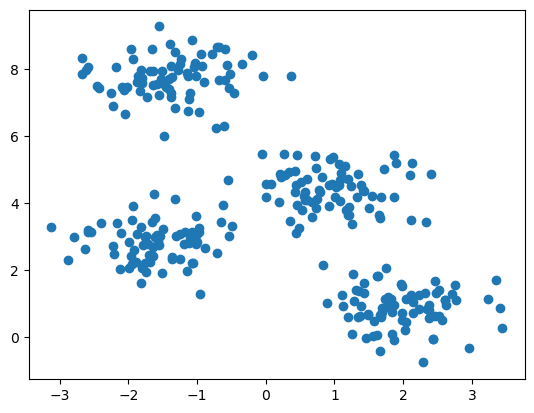

In [64]:
plt.scatter(x[:,0],x[:,1])


In [67]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)

In [70]:
distance, indices = nbrs.kneighbors(x)

In [72]:
distance = np.sort(distance, axis = 0)

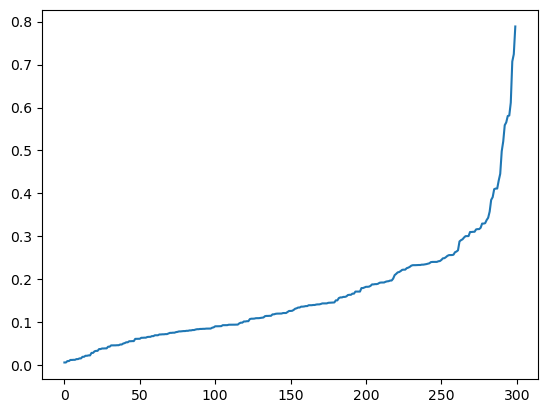

In [74]:
plt.plot(distance[:,1])

In [148]:
cluster = DBSCAN(eps= 0.6,min_samples = 4)
cluster.fit(x)

DBSCAN(eps=0.6, min_samples=4)

In [149]:
clusters = cluster.labels_
len(set(clusters))

5

In [150]:
from sklearn.metrics import silhouette_score
silhouette_score(x,clusters)

0.6605541095579138

In [151]:
 cluster.labels_
    

array([ 2,  0,  1,  0,  2, -1,  3,  1,  0,  0,  3,  0,  1,  0,  2,  1,  1,
        2,  3,  3,  2,  2,  1,  3,  3,  1,  2,  1,  3,  1,  0,  0,  1,  0,
        0,  0,  0,  0,  3,  2,  1,  3,  1,  1,  3,  3,  0,  3,  0,  2,  3,
        2,  0,  2,  2,  3,  0,  3,  0,  2,  0,  1,  0,  3,  3,  3,  0,  2,
        0,  3,  1,  3,  0,  3,  3,  0,  3,  1,  2,  0,  2,  1,  2,  2,  0,
        1,  2,  1,  0,  0,  1,  2,  0,  3,  3,  1,  2,  2,  1,  3,  0,  2,
        0,  2,  1,  2,  2,  1,  0,  1,  3,  3,  2,  0,  2,  1,  0,  2,  2,
        1,  3,  2,  3,  2,  2,  2,  2,  3,  2,  3,  0,  3,  3,  2,  0,  3,
        3,  0,  1,  0,  0,  3,  1,  3,  1,  3,  0,  1,  0,  0,  0,  1,  0,
        1,  2,  3,  0,  3,  2,  1,  0,  1,  1,  2,  1,  3, -1,  1,  2,  1,
        1,  0,  2,  1, -1,  0,  2,  2,  1,  3,  2,  1,  3,  3,  1,  1,  1,
        1,  2,  0,  1,  3,  1,  1,  3,  3,  3,  1,  3,  0,  1,  3,  2,  3,
        1, -1,  3,  0,  1,  0,  1,  3,  1,  1,  0,  3,  3,  2,  2,  1,  0,
        2,  2,  3,  2,  3

In [153]:
import numpy as np
from sklearn import metrics
# identify core samples
core_samples = np.zeros_like(clusters, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True
print(core_samples)

[False  True False  True False  True  True False False  True False False
 False  True False  True  True False  True False  True  True False  True
 False False  True False False False False  True False False False False
 False False False False  True False  True  True False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True Fa

In [154]:
dbscan.core_sample_indices_

array([  1,   3,   5,   6,   9,  13,  15,  16,  18,  20,  21,  23,  26,
        31,  40,  42,  43,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 165, 166, 170, 172, 173, 174, 176, 178, 179], dtype=int64)